## Overview:
This notebook will focus on shaping the data in ways that make it satisfactory for the machine learning process. 

### Scale the dataset
In general, learning algorithms benefit from standardization of the data set. If some outliers are present in the set, robust scalers or transformers are more appropriate. Standardization of datasets is a common requirement for many machine learning estimators implemented in scikit-learn.

In [1]:
import pandas as pd 
import numpy as np  
import sys
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split  
from sklearn.model_selection import cross_val_score
import random

import warnings
warnings.filterwarnings('ignore')

In [2]:
# START:OWN CODE
sys.path.append('/Users/Kassi/Desktop/Gender_Recognition_by_Voice')

In [3]:
path = '/Users/Kassi/Desktop/Gender_Recognition_by_Voice/voice.csv'
voice_data = pd.read_csv(path)
col_names = list(voice_data.columns.values)
print("Total number of samples: {}".format(voice_data.shape[0]))
print("Total number of male: {}".format(voice_data[voice_data.label == 'male'].shape[0]))
print("Total number of female: {}".format(voice_data[voice_data.label == 'female'].shape[0]))

Total number of samples: 3168
Total number of male: 1584
Total number of female: 1584


#### Check if dataset contains NA's

In [4]:
voice_data.isnull().any().any()

False

Fortunately, our dataset does not contain any missing values and therefore does not need cleaning.

In [5]:
voice_data = voice_data.values
voices = voice_data[:, :-1] 
labels = voice_data[:, -1:]

In [6]:
gender_encoder = LabelEncoder()
labels = gender_encoder.fit_transform(labels)

In [7]:
# 2 most significant features (IQR and meanfun)
voices_two_features = voices[:,[5,12]]
labels_two_features = labels

# train_x_two_features.shape
# labels_two_features.shape

In [8]:
# Splitting the whole dataset into the Training set and Test set
train_x, test_x, train_y, test_y = train_test_split(voices, labels, test_size=0.25, random_state = 42)  

# Splitting the subset into the Training set and Test set
train_x_two_features, test_x_two_features, train_y_two_features, test_y_two_features = train_test_split(voices_two_features, labels_two_features, test_size=0.25, random_state = 42)  

In [9]:
# Feature Scaling (all features)
# Learning algorithms benefit from standardization of the whole data set
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
train_x = sc.fit_transform(train_x)
test_x = sc.transform(test_x)

In [10]:
# Feature Scaling (top 2 features)
# Learning algorithms benefit from standardization of the subset
sc = StandardScaler()
train_x_two_features = sc.fit_transform(train_x_two_features)
test_x_two_features = sc.transform(test_x_two_features)

### Feature Importance
We used random forest to gain an insight on the importance of each feature. And again, we found that the IQR and Meanfun are two most significant features

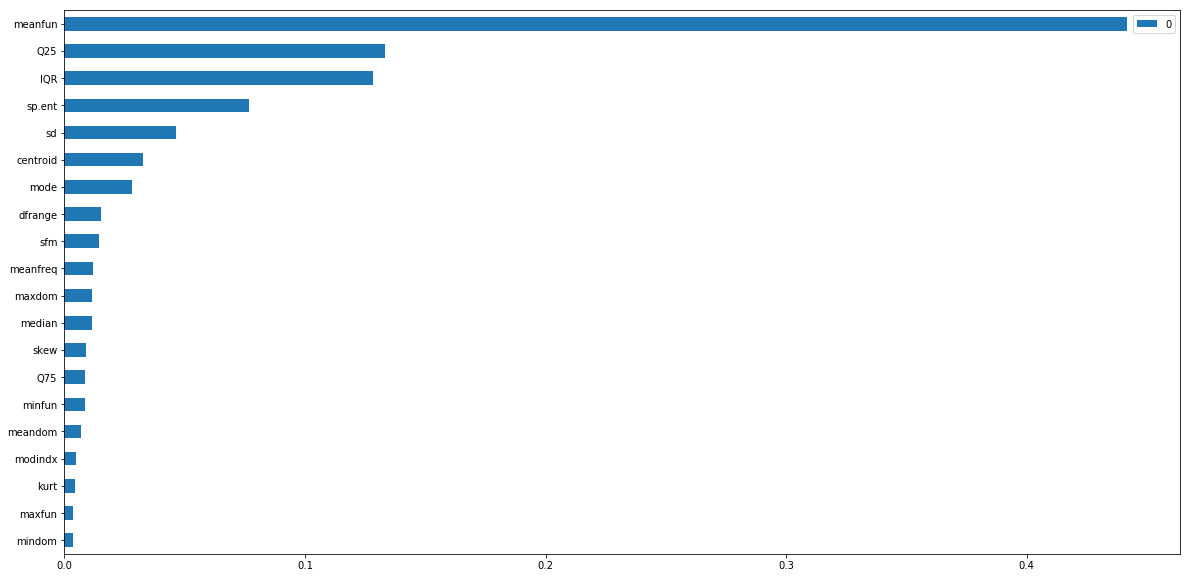

In [11]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.tools.plotting import scatter_matrix

clf = RandomForestClassifier()
clf.fit(voices, labels)
col_names = col_names[:-1]
#print(col_names)
importance = list(zip(clf.feature_importances_ , col_names))
#print(importance)
importance.sort()
pd.DataFrame(importance, index=[x for (_,x) in importance]).plot(kind = 'barh', figsize=(20,len(importance)/2))
plt.show()

The plot above showed the top two features are still meanfun and IQR.

### Principle Component Analysis(PCA)
The number of components is determined by looking at the cumulative explained variance ratio as a function of the number of components

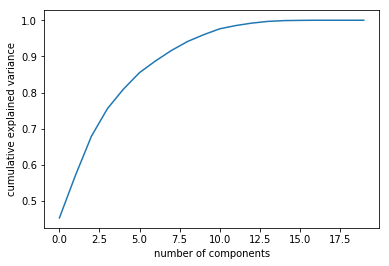

In [12]:
from sklearn.decomposition import PCA

pca = PCA().fit(train_x)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.show()

This curve quantifies how much of the total, 20-dimensional variance is contained within the first N components. For example, we see that with the digits the first 5 components contain approximately 85% of the variance, while we need around 10 components to describe close to 100% of the variance.

In [13]:
pca = PCA(n_components = 10)
pca.fit(train_x)
pca_train_x = pca.transform(train_x)
pca_test_x = pca.transform(test_x)

In [14]:
# Store variables in the current directory and use it later
%store train_x
%store test_x
%store train_y
%store test_y

%store voices
%store labels

%store train_x_two_features
%store test_x_two_features
%store train_y_two_features
%store test_y_two_features

%store pca_train_x
%store pca_test_x

Stored 'train_x' (ndarray)
Stored 'test_x' (ndarray)
Stored 'train_y' (ndarray)
Stored 'test_y' (ndarray)
Stored 'voices' (ndarray)
Stored 'labels' (ndarray)
Stored 'train_x_two_features' (ndarray)
Stored 'test_x_two_features' (ndarray)
Stored 'train_y_two_features' (ndarray)
Stored 'test_y_two_features' (ndarray)
Stored 'pca_train_x' (ndarray)
Stored 'pca_test_x' (ndarray)


In [15]:
# Importing Jupyter Notebooks as Modules 
# code get from http://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Importing%20Notebooks.html

import io, os, sys, types
from IPython import get_ipython
from nbformat import read
from IPython.core.interactiveshell import InteractiveShell

def find_notebook(fullname, path=None):
    """find a notebook, given its fully qualified name and an optional path

    This turns "foo.bar" into "foo/bar.ipynb"
    and tries turning "Foo_Bar" into "Foo Bar" if Foo_Bar
    does not exist.
    """
    name = fullname.rsplit('.', 1)[-1]
    if not path:
        path = ['']
    for d in path:
        nb_path = os.path.join(d, name + ".ipynb")
        if os.path.isfile(nb_path):
            return nb_path
        # let import Notebook_Name find "Notebook Name.ipynb"
        nb_path = nb_path.replace("_", " ")
        if os.path.isfile(nb_path):
            return nb_path
        
        
class NotebookLoader(object):
    """Module Loader for Jupyter Notebooks"""
    def __init__(self, path=None):
        self.shell = InteractiveShell.instance()
        self.path = path

    def load_module(self, fullname):
        """import a notebook as a module"""
        path = find_notebook(fullname, self.path)

        print ("importing Jupyter notebook from %s" % path)

        # load the notebook object
        with io.open(path, 'r', encoding='utf-8') as f:
            nb = read(f, 4)


        # create the module and add it to sys.modules
        # if name in sys.modules:
        #    return sys.modules[name]
        mod = types.ModuleType(fullname)
        mod.__file__ = path
        mod.__loader__ = self
        mod.__dict__['get_ipython'] = get_ipython
        sys.modules[fullname] = mod

        # extra work to ensure that magics that would affect the user_ns
        # actually affect the notebook module's ns
        save_user_ns = self.shell.user_ns
        self.shell.user_ns = mod.__dict__

        try:
          for cell in nb.cells:
            if cell.cell_type == 'code':
                # transform the input to executable Python
                code = self.shell.input_transformer_manager.transform_cell(cell.source)
                # run the code in themodule
                exec(code, mod.__dict__)
        finally:
            self.shell.user_ns = save_user_ns
        return mod
    

class NotebookFinder(object):
    """Module finder that locates Jupyter Notebooks"""
    def __init__(self):
        self.loaders = {}

    def find_module(self, fullname, path=None):
        nb_path = find_notebook(fullname, path)
        if not nb_path:
            return

        key = path
        if path:
            # lists aren't hashable
            key = os.path.sep.join(path)

        if key not in self.loaders:
            self.loaders[key] = NotebookLoader(path)
        return self.loaders[key]

In [16]:
sys.meta_path.append(NotebookFinder())

In [17]:
import SVM
print("Run linear svm with all features(Built-in Algorithm):")
SVM.run_linear_svm(train_x, test_x, train_y, test_y)
print("-----------------------------------------------------------")
print("Run rbf svm with all features(Built-in Algorithm):")
SVM.run_rbf_svm(train_x, test_x, train_y, test_y)
print("===========================================================")
print("Run linear svm with dimensionality reduction using PCA(Built-in Algorithm)")
SVM.run_linear_svm(pca_train_x, pca_test_x, train_y, test_y)
print("-----------------------------------------------------------")
print("Run rbf svm with dimensionality reduction using PCA(Built-in Algorithm)")
SVM.run_rbf_svm(pca_train_x, pca_test_x, train_y, test_y)
print("===========================================================")
print("Run linear svm with top 2 features(Built-in Algorithm):")
SVM.run_linear_svm(train_x_two_features, test_x_two_features, train_y_two_features, test_y_two_features)
print("===========================================================")
print("Run rbf svm with top 2 features(Built-in Algorithm):")
SVM.run_rbf_svm(train_x_two_features, test_x_two_features, train_y_two_features, test_y_two_features)


importing Jupyter notebook from SVM.ipynb
Run linear svm with all features(Built-in Algorithm):
In-sample accuracy for svm with Linear kernel: 0.9743290243
Out-of-sample accuracy for svm with Linear kernel: 0.9722076268
-----------------------------------------------------------
Run rbf svm with all features(Built-in Algorithm):
In-sample accuracy for svm with RBF kernel: 0.9806448362
Out-of-sample accuracy for svm with RBF kernel: 0.9722235491
Run linear svm with dimensionality reduction using PCA(Built-in Algorithm)
In-sample accuracy for svm with Linear kernel: 0.9751702488
Out-of-sample accuracy for svm with Linear kernel: 0.9734654884
-----------------------------------------------------------
Run rbf svm with dimensionality reduction using PCA(Built-in Algorithm)
In-sample accuracy for svm with RBF kernel: 0.9781202858
Out-of-sample accuracy for svm with RBF kernel: 0.9633787119
Run linear svm with top 2 features(Built-in Algorithm):
In-sample accuracy for svm with Linear kernel:

In [ ]:
import KNN
print("with all features(Built-in Algorithm):")
KNN.run_k_nearest_neighbour(train_x, test_x, train_y, test_y)
print("===========================================================")
print("with all features(Self-Written Algorithm):")
KNN.run_my_k_nearest_neighbour(train_x, test_x, train_y, test_y)
print("===========================================================")
print("with top 2 features(Built-in Algorithm):")
KNN.run_k_nearest_neighbour(train_x_two_features, test_x_two_features, train_y_two_features, test_y_two_features)
print("===========================================================")
print("with top 2 features(Self-Written Algorithm):")
KNN.run_my_k_nearest_neighbour(train_x_two_features, test_x_two_features, train_y_two_features, test_y_two_features)
print("===========================================================")
print("with dimensionality reduction using PCA(Built-in Algorithm)")
KNN.run_k_nearest_neighbour(pca_train_x, pca_test_x, train_y, test_y)
print("===========================================================")
print("with dimensionality reduction using PCA(Self-Written Algorithm)")
KNN.run_my_k_nearest_neighbour(pca_train_x, pca_test_x, train_y, test_y)

importing Jupyter notebook from Random_Forest.ipynb
Run random forest with all features(Built-in Algorithm):


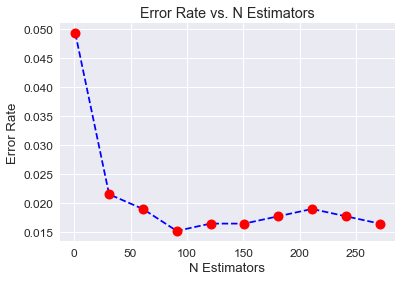

Lowest error of 0.0151515151515 occurs at n=91.
The highest in-sample accuracy in Random Forest is 0.984848484848 when n=91.
Out-of-sample accuracy in Random Forest:0.9709497651

Run random forest with top 2 features(Built-in Algorithm):


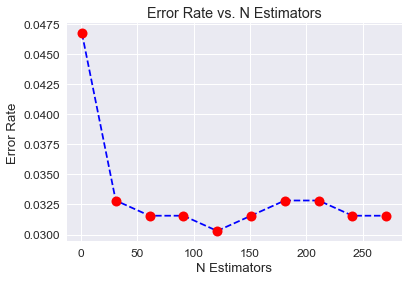

Lowest error of 0.030303030303 occurs at n=121.
The highest in-sample accuracy in Random Forest is 0.969696969697 when n=121.
Out-of-sample accuracy in Random Forest:0.9709497651

Run random forest with dimensionality reduction using PCA(Built-in Algorithm)


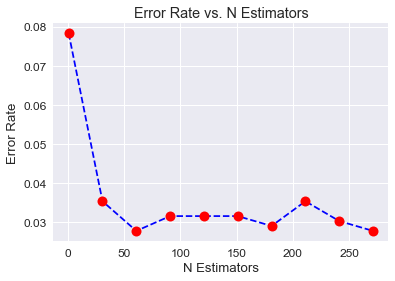

Lowest error of 0.0277777777778 occurs at n=61.
The highest in-sample accuracy in Random Forest is 0.972222222222 when n=61.
Out-of-sample accuracy in Random Forest:0.9570575591


In [19]:
import Random_Forest
print("Run random forest with all features(Built-in Algorithm):")
Random_Forest.run_random_forest_classifier(train_x, test_x, train_y, test_y)
print("===============================================================================\n")
print("Run random forest with top 2 features(Built-in Algorithm):")
Random_Forest.run_random_forest_classifier(train_x_two_features, test_x_two_features, train_y_two_features, test_y_two_features)
print("===============================================================================\n")
print("Run random forest with dimensionality reduction using PCA(Built-in Algorithm)")
Random_Forest.run_random_forest_classifier(pca_train_x, pca_test_x, train_y, test_y)

importing Jupyter notebook from Decision_Tree.ipynb


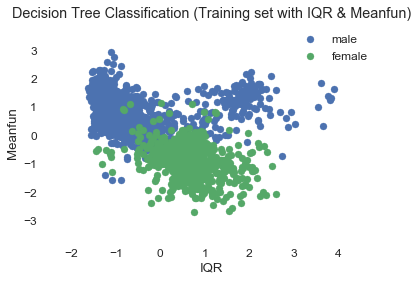

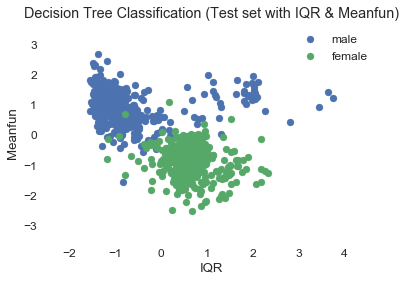

In-Sample Accuracy:100.0000%
Out-of-Sample Accuracy:95.8333%



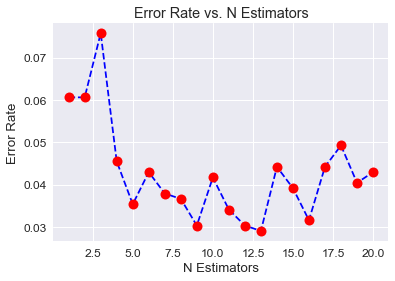

Lowest error of 0.0290404040404 occurs at n=13.
In-Sample Accuracy:100.0000%
Out-of-Sample Accuracy:95.7071%



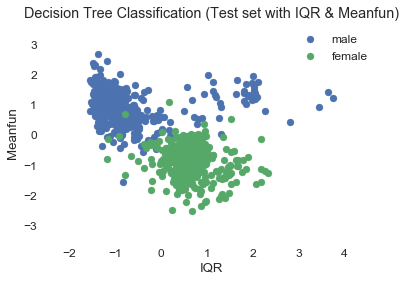

NameError: name 'visualize_testing' is not defined

In [20]:
import Decision_Tree
print("with all features(Built-in Algorithm):")
Decision_Tree.run_Decision_tree(train_x, test_x, train_y, test_y)

In [ ]:
from sklearn.linear_model import LogisticRegression
import Logistic_Regression
print("Run Logistic Regression with all features(Built-in Algorithm):")
Logistic_Regression.run_Logistic_Regression(train_x,test_x,train_y,test_y)
print("===============================================================================\n")
print("Run Logistic Regression with top 2 features(Built-in Algorithm):")
Logistic_Regression.run_Logistic_Regression(train_x_two_features, test_x_two_features, train_y_two_features, test_y_two_features)
print("===============================================================================\n")
print("Run Logistic Regression with dimensionality reduction using PCA(Built-in Algorithm)")
Logistic_Regression.run_Logistic_Regression(pca_train_x, pca_test_x, train_y, test_y)


In [ ]:
import Neural_Network
print("Run Neural Network with all features(Built-in Algorithm):")
Neural_Network.run_neural_network(train_x,train_y,test_x,test_y)(train_x, test_x, train_y, test_y)
print("===============================================================================\n")
print("Run Neural Network with all features(Built-in Algorithm):")
Neural_Network.run_my_neural_network(train_x, test_x, train_y, test_y)

In [ ]:
import Gaussian_Naive_Bayes

print("Run Gaussian Naive Bayes with all features(Built-in Algorithm):")
Gaussian_Naive_Bayes.run_naive_bayes(train_x, test_x, train_y, test_y)
print("===============================================================================\n")
print("Run Gaussian Naive Bayes with all features(Self-Written Algorithm):")
Gaussian_Naive_Bayes.run_my_gaussian_naive_bayes(train_x, test_x, train_y, test_y)
print("===============================================================================\n")
print("Run Gaussian Naive Bayes with top 2 features(Built-in Algorithm):")
Gaussian_Naive_Bayes.run_naive_bayes(train_x_two_features, test_x_two_features, train_y_two_features, test_y_two_features)
print("===============================================================================\n")
print("Run Gaussian Naive Bayes with dimensionality reduction using PCA(Built-in Algorithm)")
Gaussian_Naive_Bayes.run_naive_bayes(pca_train_x, pca_test_x, train_y, test_y)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn import svm
def getModels(train_x, test_x, train_y, test_y):
    # KNN
    error_rate = []
    kvals = range(1,21)  # range of k parameters to test
    for i in kvals:
        knn = KNeighborsClassifier(n_neighbors=i)
        knn.fit(train_x,train_y)
        pred_y_i = knn.predict(test_x)
        error_rate.append(np.mean(pred_y_i != test_y))
    kloc = error_rate.index(min(error_rate))
    clf = KNeighborsClassifier(kvals[kloc], 'uniform')
    clf1 =clf.fit(train_x, train_y)
    
    # Decision Tree
    clf2 = tree.DecisionTreeClassifier()
    clf2 = clf2.fit(train_x, train_y)
    
    # Random Forest
    error_rate = []
    nvals = range(1,301,30)
    for i in nvals:
        clf = RandomForestClassifier(n_estimators=i)
        clf.fit(train_x,train_y)
        pred_y_i = clf.predict(test_x)
        error_rate.append(np.mean(pred_y_i != test_y))
    nloc = error_rate.index(min(error_rate))
    clf3 = RandomForestClassifier(n_estimators= nvals[nloc])
    clf3 = clf3.fit(train_x, train_y)
    
    # SVM
    clf4 = svm.SVC()
    clf4 = clf4.fit(train_x, train_y)
    
    # Naive Bayes
    clf5 = GaussianNB()
    clf5 = clf5.fit(train_x, train_y)
     
    return [clf1, clf2, clf3, clf4, clf5]

In [ ]:
# Majority vote
def run_majority_voting(train_x, test_x, train_y, test_y):
    models = getModels(train_x, test_x, train_y, test_y);
    correct = 0;
    for i in range(len(test_x)):
        count = 0;
        for j in range(len(models)):
            if (models[j].predict(test_x[i].reshape(1,-1))[0] == test_y[i]):
                count = count + 1;
            else:
                count = count - 1;
        if (count > 0):
            correct = correct + 1;
        
    accuracy = (correct*1.0)/len(test_x)
    print("Majority vote accuracy : %.10f" % accuracy)

In [ ]:
print("Run majority voting with all features(Built-in Algorithm):")
run_majority_voting(train_x, test_x, train_y, test_y)
print("===============================================================================")
print("Run majority voting with top 2 features(Built-in Algorithm):")
run_majority_voting(train_x_two_features, test_x_two_features, train_y_two_features, test_y_two_features)
print("===============================================================================")
print("Run majority voting with dimensionality reduction using PCA(Built-in Algorithm)")
run_majority_voting(pca_train_x, pca_test_x, train_y, test_y)

In [ ]:
# Our test data
path = '/Users/Kassi/Desktop/Gender_Recognition_by_Voice/voice_test.csv'
voice_data_test = pd.read_csv(path)
print("Total number of samples: {}".format(voice_data_test.shape[0]))
print("Total number of male: {}".format(voice_data_test[voice_data_test.label == 'male'].shape[0]))
print("Total number of female: {}".format(voice_data_test[voice_data_test.label == 'female'].shape[0]))
print("Correlation between each feature")

In [ ]:
#### Check if dataset contains NA's
voice_data_test.isnull().any().any()

In [ ]:
voice_data_test = voice_data_test.values
voices_test = voice_data_test[:, :-1] 
labels_test = voice_data_test[:, -1:]

In [ ]:
gender_encoder = LabelEncoder()
labels_test = gender_encoder.fit_transform(labels_test)
# labels_test

In [ ]:
# randomly shuffle our data
voices_tmp = []  
lables_tmp = []  
index_shuf = range(len(voices_test)) 
random.shuffle(index_shuf) 
for i in index_shuf:  
    voices_tmp.append(voices_test[i])  
    lables_tmp.append(labels_test[i])  
voices_test = np.array(voices_tmp)  
labels_test = np.array(lables_tmp) 


In [ ]:
print("Run random forest with all features(Built-in Algorithm):")
Random_Forest.run_random_forest_classifier(train_x, voices_test, train_y,labels_test)
print("===============================================================================\n")
print("Run majority voting with all features(Built-in Algorithm):")
run_majority_voting(train_x, voices_test, train_y, labels_test)
print("===============================================================================\n")
print("Run linear svm with all features(Built-in Algorithm):")
SVM.run_linear_svm(train_x, voices_test, train_y, labels_test)
print("===============================================================================\n")
print("Run rbf svm with all features(Built-in Algorithm):")
SVM.run_rbf_svm(train_x, voices_test, train_y, labels_test)
print("===============================================================================\n")
print("with all features(Built-in Algorithm):")
KNN.run_k_nearest_neighbour(train_x, test_x, train_y, test_y)

In [ ]:
# END:OWN CODE